In [1]:
# import numpy as np
import pandas as pd
import os, time, json
pd.options.mode.chained_assignment = None

# Dataset Import & Pre-processing

In [2]:
dfile = pd.read_csv("dataset/BMS Requirements.csv")
dfile

,Req ID,Req Name,Description,Pre-requisite,Cost,Value,Test Cases,Importance
0,101,URL,Unique web address to access the website,0,8,9,3,H
1,102,Choose Region Modal,To choose the city inorder to proceed,101,3,2,3,H
2,103,Home Page,Contains various...,102,7,8,5,H
3,104,Change Region,Enables to change the city,103,4,3,1,M
4,105,Search,To perform search,103,6,7,2,H
...,...,...,...,...,...,...,...,...
95,196,Brand Promotion,Corporate Brand Promotion,194,6,4,2,H
96,197,Bulk SMS Communication,Corporate feature enabling communication via S...,194,7,7,1,L
97,198,Corporate Gifting,Customizable Corporate Gifting schemes,194,4,8,3,M
98,199,Partner with BookMyShow,Partner with BookMyShow Corporate Suite,194,4,5,2,H


In [3]:
dfile=dfile.drop(["Description","Test Cases"],axis=1)

In [4]:
dfile['Pre-requisite'].unique()

array([  0, 101, 102, 103, 105, 107, 112, 114, 127, 133, 136, 137, 138,
       139, 142, 143, 146, 147, 164, 172, 174, 175, 179, 183, 188, 189,
       192, 194])

In [5]:
PRE_REQ_C = [0]*dfile['Req ID'].count()
dfile['PRE_REQ_COUNT'] = PRE_REQ_C

In [6]:
for i in dfile['Pre-requisite']:
    if i in dfile['Req ID'].values:
        print(i," is a Pre-requisite", end=" ")
        pos = dfile.loc[dfile['Req ID']==i].index.values[0]
        dfile.loc[ dfile['Req ID']==i, 'PRE_REQ_COUNT'] += 1
        print("at row: ",pos, end='\n')

101  is a Pre-requisite at row:  0
102  is a Pre-requisite at row:  1
103  is a Pre-requisite at row:  2
103  is a Pre-requisite at row:  2
105  is a Pre-requisite at row:  4
103  is a Pre-requisite at row:  2
107  is a Pre-requisite at row:  6
107  is a Pre-requisite at row:  6
107  is a Pre-requisite at row:  6
107  is a Pre-requisite at row:  6
107  is a Pre-requisite at row:  6
103  is a Pre-requisite at row:  2
112  is a Pre-requisite at row:  11
103  is a Pre-requisite at row:  2
103  is a Pre-requisite at row:  2
103  is a Pre-requisite at row:  2
103  is a Pre-requisite at row:  2
103  is a Pre-requisite at row:  2
103  is a Pre-requisite at row:  2
103  is a Pre-requisite at row:  2
103  is a Pre-requisite at row:  2
103  is a Pre-requisite at row:  2
103  is a Pre-requisite at row:  2
103  is a Pre-requisite at row:  2
103  is a Pre-requisite at row:  2
114  is a Pre-requisite at row:  13
127  is a Pre-requisite at row:  26
127  is a Pre-requisite at row:  26
127  is a Pre-re

In [7]:
dfile.head()

,Req ID,Req Name,Pre-requisite,Cost,Value,Importance,PRE_REQ_COUNT
0,101,URL,0,8,9,H,1
1,102,Choose Region Modal,101,3,2,H,1
2,103,Home Page,102,7,8,H,21
3,104,Change Region,103,4,3,M,0
4,105,Search,103,6,7,H,1


In [8]:
n = pd.get_dummies( dfile["Importance"] )
dfile=pd.concat([dfile,n],axis=1)

In [9]:
Weightage = [0]*dfile['Req ID'].count()
dfile['Weightage'] = Weightage

In [10]:
dfile = dfile.drop(['Importance'], axis=1)

In [11]:
dfile['Weightage']=(dfile['PRE_REQ_COUNT']+
    (10-(dfile['Cost']/dfile['Value']))+
    (10*dfile['H']) + (5*dfile['M']) + (1*dfile['L'])
)

In [12]:
dfile

,Req ID,Req Name,Pre-requisite,Cost,Value,PRE_REQ_COUNT,H,L,M,Weightage
0,101,URL,0,8,9,1,1,0,0,20.111111
1,102,Choose Region Modal,101,3,2,1,1,0,0,19.500000
2,103,Home Page,102,7,8,21,1,0,0,40.125000
3,104,Change Region,103,4,3,0,0,0,1,13.666667
4,105,Search,103,6,7,1,1,0,0,20.142857
...,...,...,...,...,...,...,...,...,...,...
95,196,Brand Promotion,194,6,4,0,1,0,0,18.500000
96,197,Bulk SMS Communication,194,7,7,0,0,1,0,10.000000
97,198,Corporate Gifting,194,4,8,0,0,0,1,14.500000
98,199,Partner with BookMyShow,194,4,5,0,1,0,0,19.200000


# Function for algorithm input

In [13]:
def obj_function(genome):
    x1, x2, x3, x4, x5, x6 = genome
    
    if x5==x6:
        x6=0
    if x4==x5 or x4==x6:
        x5 = x6 = 0
    if x4>x5 and x4>x6:
        x5 = x6 = 0
    if x5>x6 and x5>x4:
        x4 = x6 = 0
    if x6>x4 and x6>x5:
        x4 = x5 = 0
        
    if x3==0:
        return 0
    else:
        return x1 + (10-(x2/x3)) + (x4*9) + (x5*5) + (x6*1)

# Genetic Algorithm

In [14]:
ga_start = time.time()

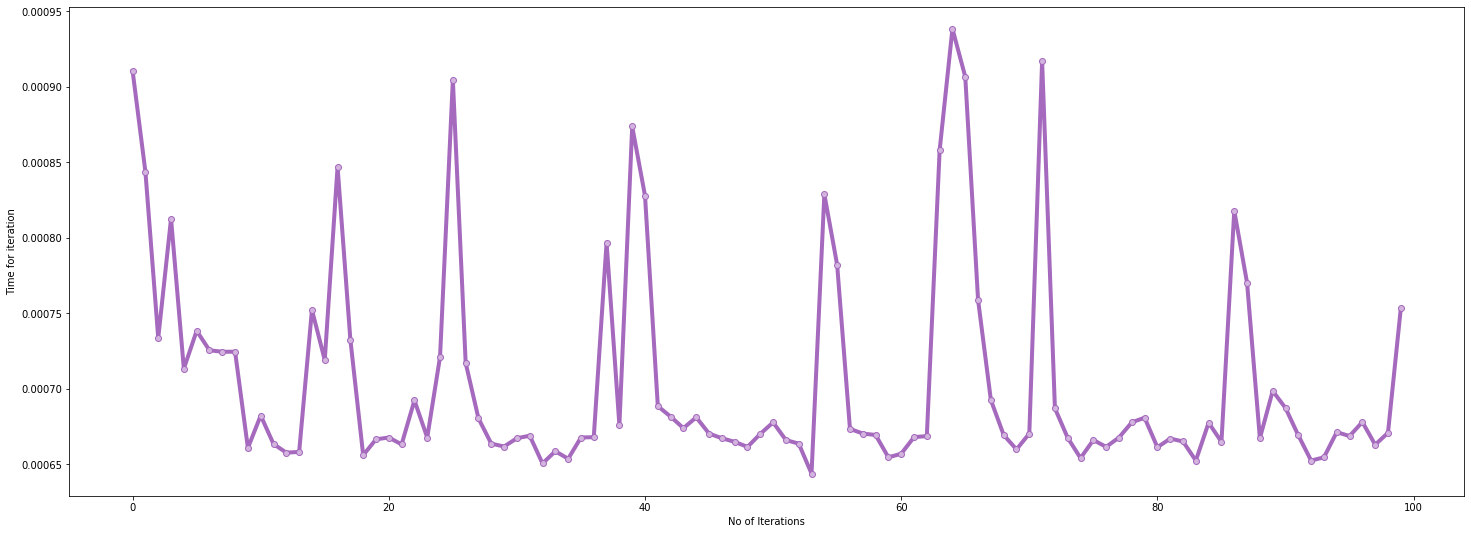

Best values for x:  [20  1  6  1  0  0]
Best value for f(x): 38.833333333333336


In [15]:
from GA import GeneticAlgorithm

population_size = 100; genome_length = 6

ga = GeneticAlgorithm(
    obj_function, 
    pop_size=population_size, 
    genome_length=genome_length,
    lb=[dfile['PRE_REQ_COUNT'].min(), dfile['Cost'].min(), dfile['Value'].min(), 0, 0, 0 ],
    ub=[dfile['PRE_REQ_COUNT'].max(), dfile['Cost'].max(), dfile['Value'].max(), 2, 2, 2]
)
ga.generate_binary_population()
ga.number_of_pairs = 4

ga.selective_pressure = 1.4
ga.mutation_rate = 0.1

ga.run(100)

best_genome, best_fitness = ga.get_best_genome()
print("Best values for x: ", best_genome)
print("Best value for f(x):", best_fitness)

In [16]:
ga_total = time.time() - ga_start
print("GA took ",ga_total," seconds")

GA took  0.9084532260894775  seconds


## Output based on GA

In [17]:
gafile = dfile.copy()

In [18]:
gafile['Difference'] = abs( gafile['Weightage']-best_fitness)
gafile = gafile.drop(['H', 'L', 'M'], axis=1)
gafile.sort_values('Difference', ascending=True, axis=0, inplace = True)

In [19]:
gafile

,Req ID,Req Name,Pre-requisite,Cost,Value,PRE_REQ_COUNT,Weightage,Difference
2,103,Home Page,102,7,8,21,40.125000,1.291667
63,164,Check Event,114,3,6,9,28.500000,10.333333
26,127,Select Movie,114,6,9,8,27.333333,11.500000
46,147,Payment Timer,143,3,8,7,26.625000,12.208333
45,146,Payment Method,143,5,9,10,24.444444,14.388889
...,...,...,...,...,...,...,...,...
31,132,Share Movie,127,8,5,0,9.400000,29.433333
9,110,Continue with Google,107,7,3,0,8.666667,30.166667
69,170,Event Terms,164,3,1,0,8.000000,30.833333
14,115,Customer Care,103,7,2,0,7.500000,31.333333


In [20]:
gafile.to_csv('output/GA ouput.csv', index=False, encoding='utf-8')

# Particle Swarm Optimization

In [21]:
pso_start = time.time()

Running PSO...


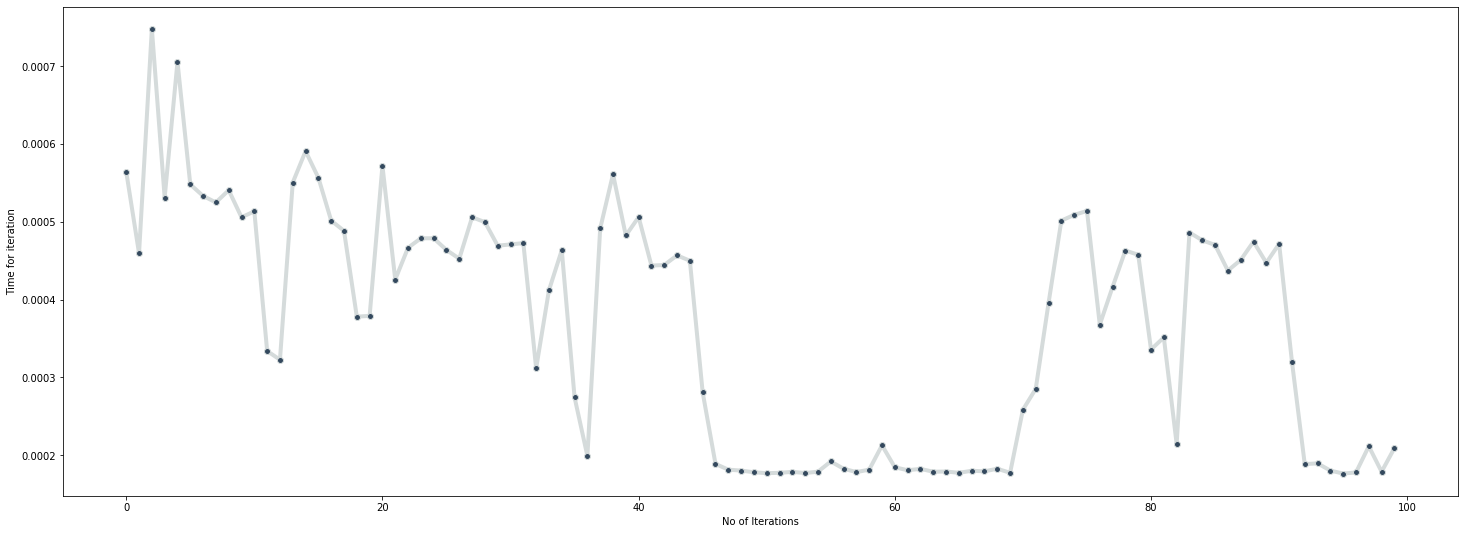

Best values of x:  [0.         4.03823551 1.         0.50700877 0.70236044 1.        ]
Best values of f(x):  39.31372250589951


In [22]:
from PSO import PSO

instance = PSO(
    func=obj_function,
    dim=6,
    lb=[dfile['PRE_REQ_COUNT'].min(), dfile['Cost'].min(), dfile['Value'].min(), 0, 0, 0 ],
    ub=[dfile['PRE_REQ_COUNT'].max(), dfile['Cost'].max(), dfile['Value'].max(), 1, 1, 1])
pso_result = instance.run(max_iter=100)

print("Best values of x: ", pso_result.gbest_x)
print("Best values of f(x): ", pso_result.gbest_y)

In [23]:
pso_total = time.time()-pso_start
print("PSO took ",pso_total," seconds")

PSO took  0.6713347434997559  seconds


## Output based on PSO

In [24]:
psofile = dfile.copy()

In [25]:
psofile['Difference'] = abs( psofile['Weightage']-best_fitness)
psofile = psofile.drop(['H', 'L', 'M'], axis=1)
psofile.sort_values('Difference', ascending=True, axis=0, inplace = True)

In [26]:
psofile

,Req ID,Req Name,Pre-requisite,Cost,Value,PRE_REQ_COUNT,Weightage,Difference
2,103,Home Page,102,7,8,21,40.125000,1.291667
63,164,Check Event,114,3,6,9,28.500000,10.333333
26,127,Select Movie,114,6,9,8,27.333333,11.500000
46,147,Payment Timer,143,3,8,7,26.625000,12.208333
45,146,Payment Method,143,5,9,10,24.444444,14.388889
...,...,...,...,...,...,...,...,...
31,132,Share Movie,127,8,5,0,9.400000,29.433333
9,110,Continue with Google,107,7,3,0,8.666667,30.166667
69,170,Event Terms,164,3,1,0,8.000000,30.833333
14,115,Customer Care,103,7,2,0,7.500000,31.333333


In [27]:
psofile.to_csv('output/PSO ouput.csv', index=False, encoding='utf-8')

# Export Output

In [28]:
dict_op = {
    "PSO":{
        "x" : list(pso_result.gbest_x),
        "f(x)" : pso_result.gbest_y
    },
    "GA":{
        "x" : best_genome.tolist(),
        "f(x)" : best_fitness
    }
}
json_op = json.dumps( dict_op )

File = open('output/output.json', 'w')
File.write( json_op )

179

In [29]:
File.close()

# Comparitive Analysis

In [30]:
# Convert to python3 script file

# !jupyter nbconvert --to script "BMS Requirements"